# Audio Exploration

In [1]:
import os
import sys
import IPython.display as ipd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

sys.path.append(os.path.abspath(os.path.join('..')))

from scripts.audio_explorer import AudioExplorer


In [2]:
ae = AudioExplorer(directory='../data/train')


AudioExplorer:INFO->Successfully Created AudioExplorer Class
AudioExplorer:INFO->Successfully Loaded Audio and TTS files


## Get Information Dataframe

In [3]:
info_df = ae.get_audio_info()
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1000 non-null   object 
 1   Channel          1000 non-null   object 
 2   Duration(sec)    1000 non-null   float64
 3   Frequency(Hz)    1000 non-null   int64  
 4   ZeroCrossings    1000 non-null   int64  
 5   MinAmplitude     1000 non-null   float64
 6   MaxAmplitude     1000 non-null   float64
 7   AmplitudeMean    1000 non-null   float64
 8   AmplitudeMedian  1000 non-null   float64
 9   HasTTS           1000 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 71.4+ KB


In [4]:
# Get a sample of the dataframe
info_df.sample(10)


,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
488,tr_10440_tr23142,Stereo,2.879,16000,96,-0.300,0.103,-0.125,-0.127,True
360,tr_10325_tr100047,Stereo,5.108,16000,154,-0.429,0.082,-0.125,-0.125,True
25,tr_10023_tr097105,Stereo,2.601,16000,1062,-0.842,0.560,-0.124,-0.125,True
778,tr_10701_tr03118,Stereo,4.365,16000,74,-0.673,0.203,-0.125,-0.126,True
364,tr_10329_tr100051,Stereo,6.223,16000,16,-0.406,0.035,-0.125,-0.125,True
172,tr_10156_tr098118,Stereo,2.601,16000,52,-0.362,0.468,-0.124,-0.125,True
694,tr_10626_tr04140,Stereo,5.108,16000,14,-0.226,0.007,-0.125,-0.126,True
976,tr_1091_tr11092,Stereo,4.923,16000,836,-0.102,0.032,-0.021,-0.021,True
552,tr_10499_tr53107,Stereo,3.994,16000,26,-1.000,0.170,-0.125,-0.126,True
792,tr_10714_tr03131,Stereo,4.180,16000,0,-0.264,-0.015,-0.125,-0.126,True


<AxesSubplot:title={'center':'Channel Types'}, xlabel='Channel', ylabel='Number of Audio-Files'>

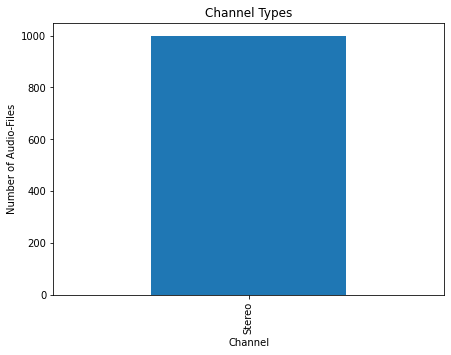

In [5]:
# Check channel types
info_df.Channel.value_counts().plot(kind='bar', title='Channel Types', ylabel='Number of Audio-Files', xlabel='Channel', figsize=(7,5))

<AxesSubplot:title={'center':'Frequency Types'}, xlabel='Frequency', ylabel='Number of Audio-Files'>

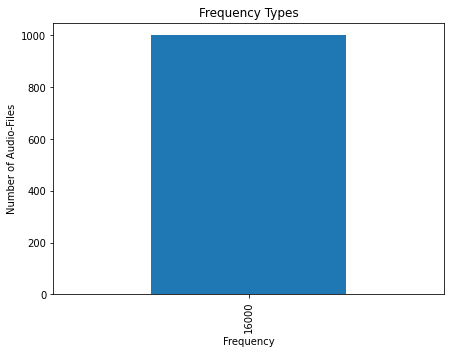

In [6]:
# Check frequency Types
info_df['Frequency(Hz)'].value_counts().plot(kind='bar', title='Frequency Types',
                                    ylabel='Number of Audio-Files', xlabel='Frequency', figsize=(7, 5))


<AxesSubplot:title={'center':'Translation Diagram'}, xlabel='Has Translation', ylabel='Number of Audio-Files'>

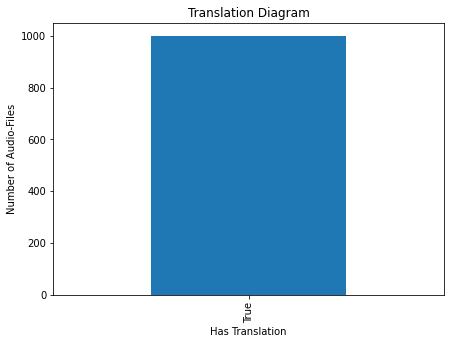

In [7]:
# Check frequency Types
info_df['HasTTS'].value_counts().plot(kind='bar', title='Translation Diagram',
                                             ylabel='Number of Audio-Files', xlabel='Has Translation', figsize=(7, 5))


In [8]:
# Grouping based on duration of audio
bins = pd.cut(info_df['Duration(sec)'], np.arange(
    0, int(max(info_df['Duration(sec)'].tolist())) + 1))
info_df.groupby(bins)['Duration(sec)'].agg(['count', 'sum']).sort_values(by='count', ascending=False)


,count,sum
Duration(sec),,
"(3, 4]",332,1151.721
"(2, 3]",297,765.795
"(4, 5]",152,674.868
"(5, 6]",75,408.303
"(6, 7]",42,272.787
"(1, 2]",34,62.137
"(7, 8]",32,238.516
"(8, 9]",16,136.182
"(9, 10]",11,106.160


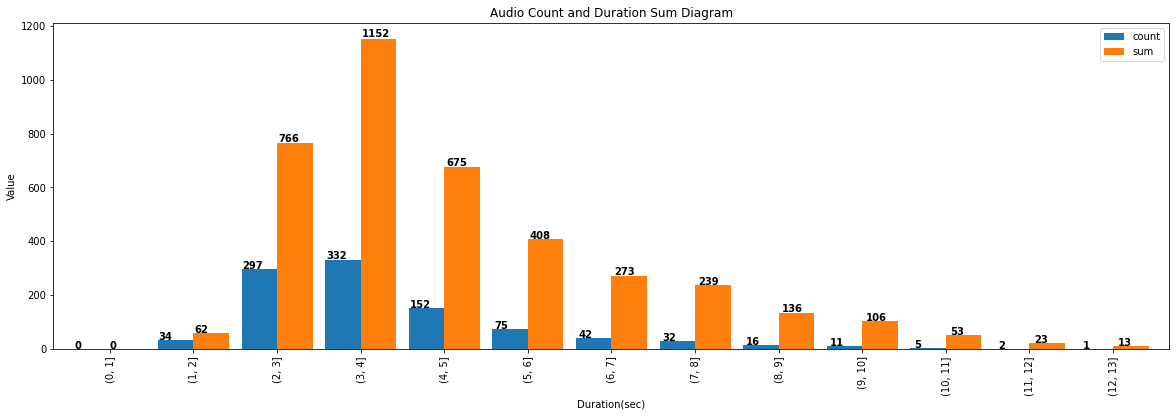

In [9]:

plot = info_df.groupby(bins)['Duration(sec)'].agg(['count', 'sum']).plot(kind='bar', width=0.85, title='Audio Count and Duration Sum Diagram',
                                                                  ylabel='Value', figsize=(20, 6))
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()
                                                   * 1.005, p.get_height() * 1.005), fontweight='bold')


## Zero-Crossings

In [10]:
# Gerouping based on zero crossingsof audios
bins = pd.cut(info_df['ZeroCrossings'], np.arange(
    0, int(max(info_df['ZeroCrossings'].tolist())) + 1, 1000))
info_df.groupby(bins)['ZeroCrossings'].agg(['count', 'sum']).sort_values(by='count', ascending=False)


,count,sum
ZeroCrossings,,
"(0, 1000]",785,114935
"(1000, 2000]",74,101349
"(2000, 3000]",31,75128
"(3000, 4000]",20,68691
"(4000, 5000]",6,26766
"(5000, 6000]",2,10296


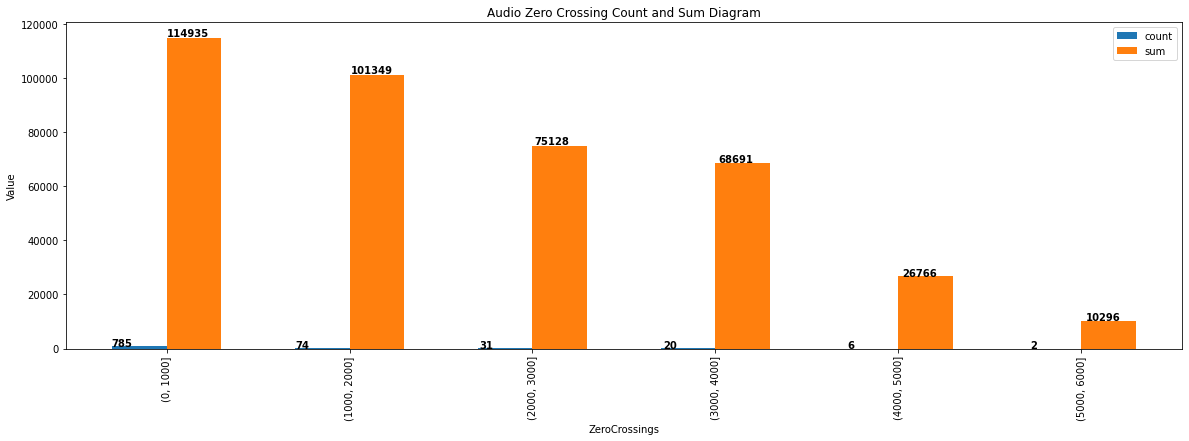

In [11]:
plot = info_df.groupby(bins)['ZeroCrossings'].agg(['count', 'sum']).plot(kind='bar', width=0.6, title='Audio Zero Crossing Count and Sum Diagram',
                                                                         ylabel='Value', figsize=(20, 6))
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()
                                                    * 1.005, p.get_height() * 1.005), fontweight='bold')


### Most audio files have around a thousand zero crossing meaning that most audio files dont have silent sounds in them. But there are some audio files that have a lot of zero crossing meaning that it has long durations where the sound is silent.

## Audios with short durations

In [12]:
# Get to know more about sounds that have short durations
dur_short_audios = info_df[info_df['Duration(sec)'] <= 2]
dur_short_audios


,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
71,tr_10065_tr098027,Stereo,1.765,16000,92,-0.352,0.071,-0.124,-0.126,True
73,tr_10067_tr098029,Stereo,1.579,16000,120,-0.450,0.143,-0.124,-0.126,True
153,tr_10139_tr098101,Stereo,1.858,16000,26,-0.883,0.424,-0.124,-0.125,True
156,tr_10141_tr098103,Stereo,1.950,16000,11,-0.284,0.020,-0.118,-0.125,True
271,tr_10245_tr099087,Stereo,1.950,16000,36,-0.303,0.029,-0.125,-0.126,True
275,tr_10249_tr099091,Stereo,1.672,16000,50,-0.419,0.068,-0.125,-0.126,True
330,tr_10299_tr100021,Stereo,1.858,16000,2,-0.269,0.000,-0.125,-0.125,True
349,tr_10315_tr100037,Stereo,1.765,16000,40,-0.372,0.042,-0.125,-0.125,True
358,tr_10323_tr100045,Stereo,1.858,16000,56,-0.364,0.140,-0.125,-0.126,True
408,tr_10369_tr100091,Stereo,1.579,16000,56,-0.349,0.034,-0.125,-0.126,True


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

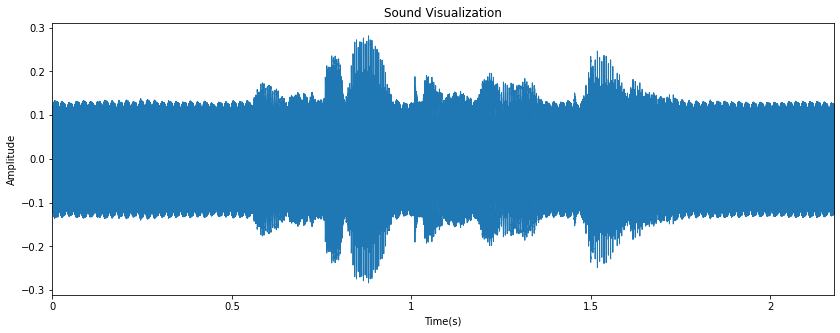

In [13]:
# Check sounds with no zero crossing
ae.get_audio_visualization(966)


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

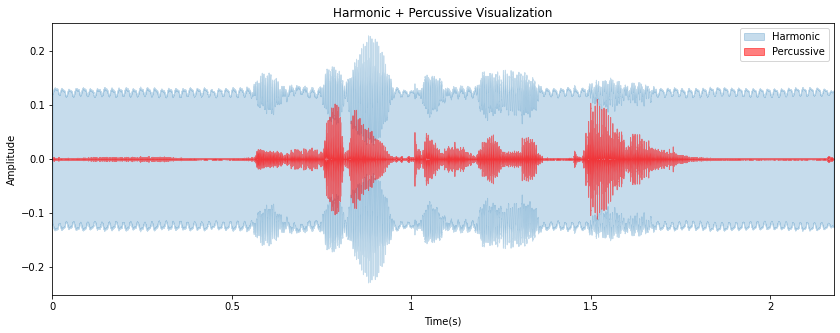

In [30]:
# Check harmonic and percussive visualization
ae.get_harmonic_percussive_visualization(966)


In [31]:
# The entire audio seems important
# Check by hearing the audio
sample_audio, sr = ae.get_audio_file(966)
ipd.Audio(sample_audio, rate=sr)


### Importance
### The sound contains no silent sounds

In [14]:
# Checking if there duration is actual recording or just silent sound
# Ordering them with zero crossing might show us which once are highly probable of having silent sound
dur_short_audios.sort_values(
    by=['ZeroCrossings', 'Duration(sec)'], ascending=False)


,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
844,tr_10761_tr05129,Stereo,1.858,16000,614,-0.724,0.344,-0.124,-0.126,True
860,tr_10776_tr05144,Stereo,1.950,16000,394,-1.000,0.352,-0.124,-0.126,True
903,tr_10814_tr02137,Stereo,1.858,16000,136,-0.276,0.071,-0.125,-0.126,True
826,tr_10745_tr05113,Stereo,1.950,16000,120,-0.543,0.097,-0.125,-0.126,True
73,tr_10067_tr098029,Stereo,1.579,16000,120,-0.450,0.143,-0.124,-0.126,True
572,tr_10516_tr53124,Stereo,1.950,16000,108,-0.696,0.347,-0.125,-0.126,True
892,tr_10804_tr02127,Stereo,1.765,16000,106,-0.330,0.142,-0.125,-0.126,True
71,tr_10065_tr098027,Stereo,1.765,16000,92,-0.352,0.071,-0.124,-0.126,True
874,tr_10789_tr02112,Stereo,1.858,16000,62,-0.377,0.070,-0.125,-0.126,True
358,tr_10323_tr100045,Stereo,1.858,16000,56,-0.364,0.140,-0.125,-0.126,True


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

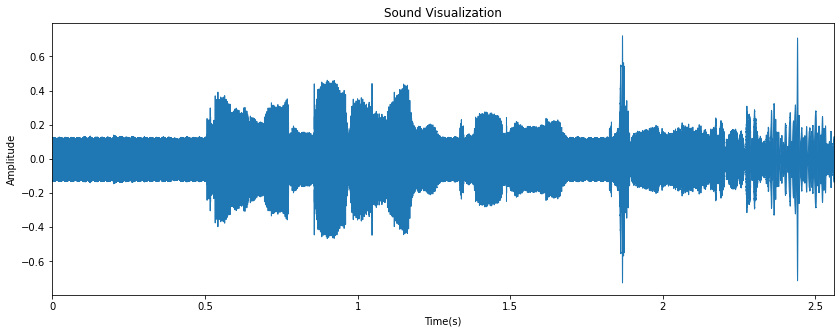

In [15]:
# Starting from the highest one
# Normal Visualization
ae.get_audio_visualization(844)


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

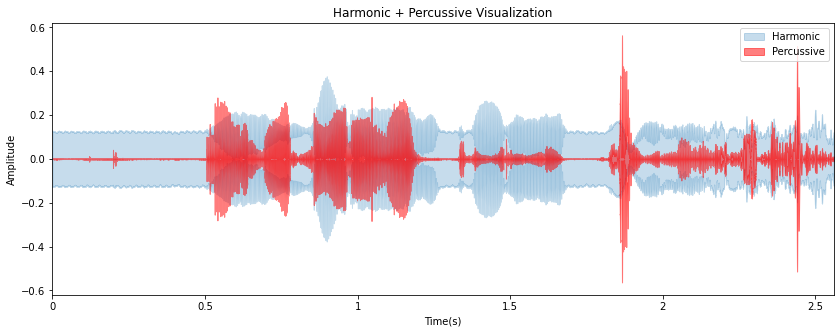

In [16]:
# Check harmonic and percussive visualization
ae.get_harmonic_percussive_visualization(844)

In [17]:
# The beginning part of the audio might not be important
# Check by hearing the audio
sample_audio, sr = ae.get_audio_file(844)
ipd.Audio(sample_audio, rate=sr)


### Importance
### The Audio in the beginning has a silence part which is not useful and can be removed

## Audios with long durations

In [18]:
# Get to know more about sounds that have long durations
dur_long_audios = info_df[info_df['Duration(sec)'] >= 10]
dur_long_audios

,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
110,tr_100_tr01100,Stereo,10.588,16000,3316,-0.030,0.012,-0.005,-0.005,True
143,tr_1012_tr11013,Stereo,10.310,16000,3118,-0.496,0.563,-0.021,-0.021,True
398,tr_1035_tr11036,Stereo,11.331,16000,5034,-0.215,0.116,-0.021,-0.021,True
509,tr_1045_tr11046,Stereo,10.774,16000,4556,-0.190,0.125,-0.021,-0.021,True
613,tr_10553_tr30114,Stereo,10.217,16000,40,-1.000,0.664,-0.125,-0.127,True
661,tr_10597_tr04111,Stereo,13.189,16000,247,-0.292,0.067,-0.124,-0.127,True
676,tr_1060_tr11061,Stereo,11.796,16000,5262,-0.245,0.171,-0.021,-0.021,True
709,tr_1063_tr11064,Stereo,12.817,16000,6482,-0.470,0.188,-0.021,-0.021,True
742,tr_1066_tr11067,Stereo,10.681,16000,4810,-0.279,0.172,-0.021,-0.021,True


In [19]:
# Checking if there duration is actual recording or just silent sound
# Ordering them with zero crossing might show us which once are highly probable of having silent sound
dur_long_audios.sort_values(
    by=['ZeroCrossings', 'Duration(sec)'], ascending=False)


,Name,Channel,Duration(sec),Frequency(Hz),ZeroCrossings,MinAmplitude,MaxAmplitude,AmplitudeMean,AmplitudeMedian,HasTTS
709,tr_1063_tr11064,Stereo,12.817,16000,6482,-0.470,0.188,-0.021,-0.021,True
676,tr_1060_tr11061,Stereo,11.796,16000,5262,-0.245,0.171,-0.021,-0.021,True
398,tr_1035_tr11036,Stereo,11.331,16000,5034,-0.215,0.116,-0.021,-0.021,True
742,tr_1066_tr11067,Stereo,10.681,16000,4810,-0.279,0.172,-0.021,-0.021,True
509,tr_1045_tr11046,Stereo,10.774,16000,4556,-0.190,0.125,-0.021,-0.021,True
110,tr_100_tr01100,Stereo,10.588,16000,3316,-0.030,0.012,-0.005,-0.005,True
143,tr_1012_tr11013,Stereo,10.310,16000,3118,-0.496,0.563,-0.021,-0.021,True
661,tr_10597_tr04111,Stereo,13.189,16000,247,-0.292,0.067,-0.124,-0.127,True
613,tr_10553_tr30114,Stereo,10.217,16000,40,-1.000,0.664,-0.125,-0.127,True


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

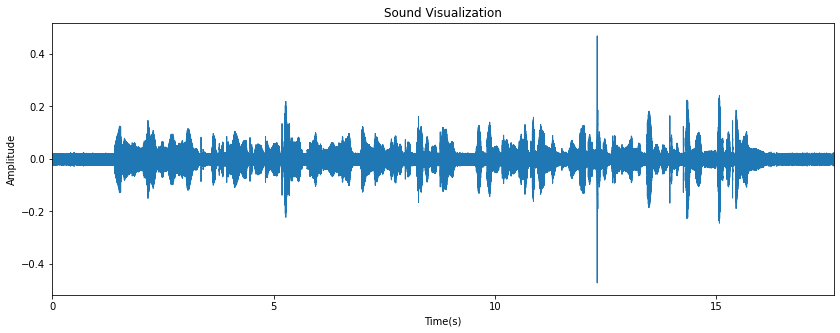

In [20]:
# Starting from the highest one
# Check normal visualization
ae.get_audio_visualization(709)

<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

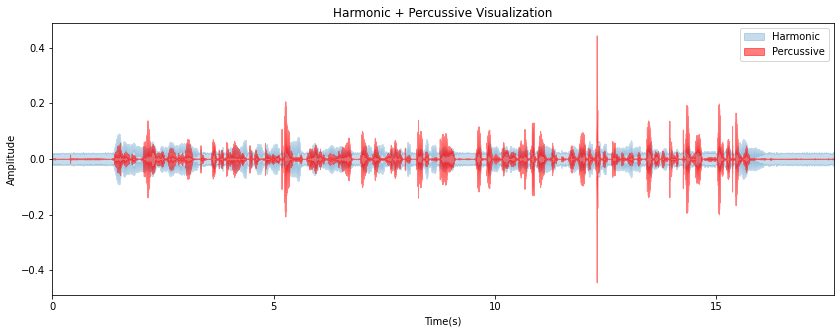

In [21]:
# Check harmonic and percussive visualization
ae.get_harmonic_percussive_visualization(709)


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

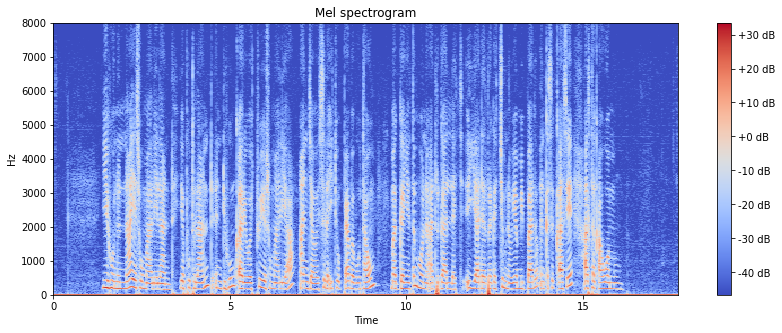

In [22]:
# Check spectogram visualization
ae.get_spectogram_visualization(709)

<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

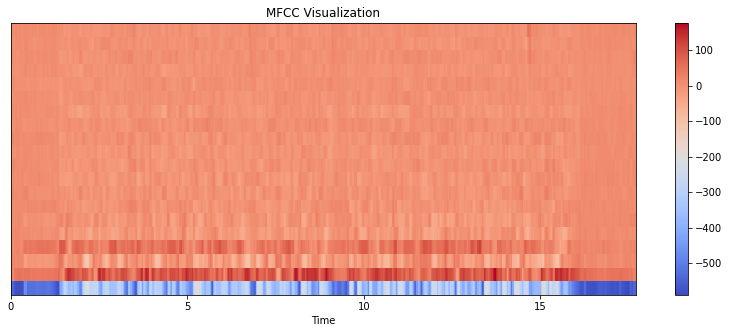

In [23]:
# Check mfcc visualization
ae.get_mfcc_visualization(709)

In [24]:
# The beginning part and the last part of the audio might not be important
# Check by hearing the audio
sample_audio, sr = ae.get_audio_file(709)
ipd.Audio(sample_audio, rate=sr)


### Importance
### The Audio in the beginning and the end has a silence parts which are not useful and can be removed

<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

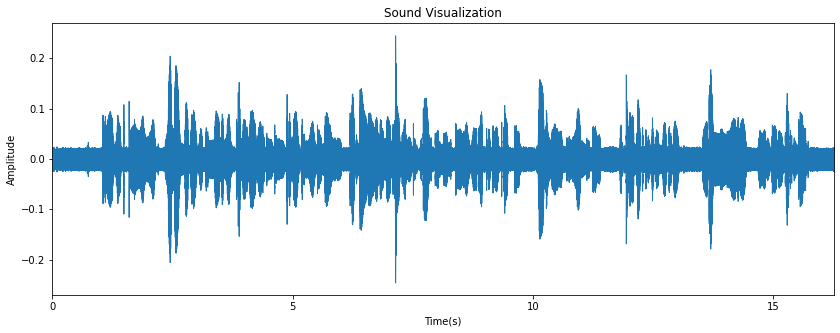

In [25]:
# Next Audio
ae.get_audio_visualization(676)


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

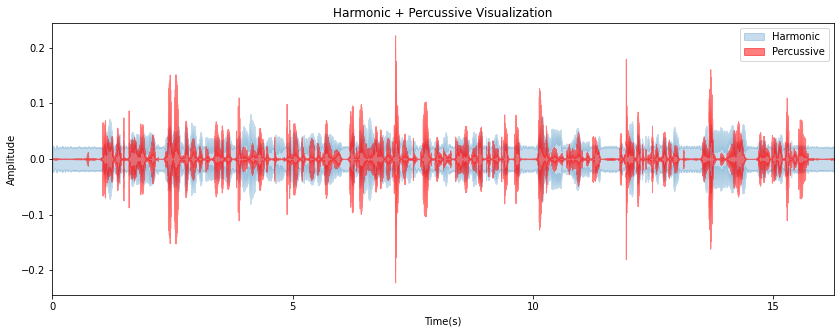

In [26]:
# Check harmonic and percussive visualization
ae.get_harmonic_percussive_visualization(676)

<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

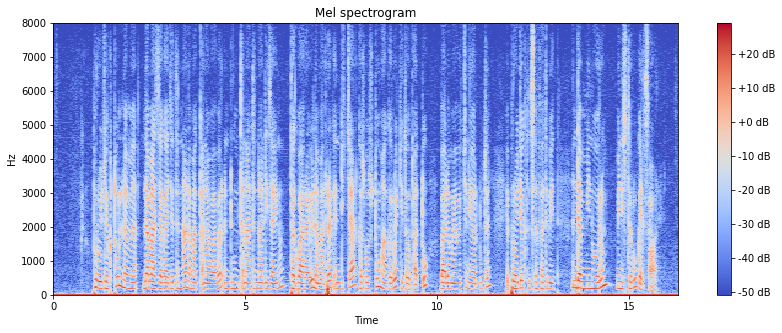

In [27]:
# Check spectogram visualization
ae.get_spectogram_visualization(676)


<module 'matplotlib.pyplot' from 'C:\\Python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

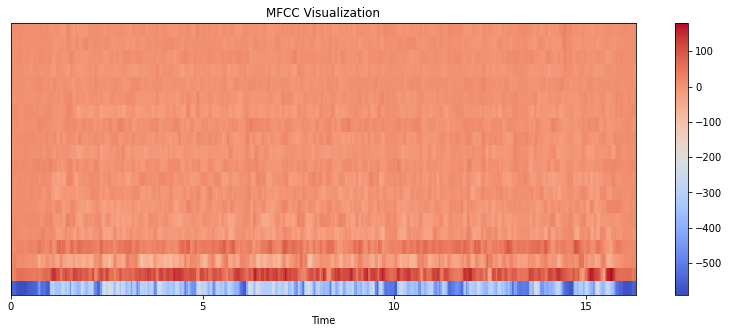

In [28]:
# Check mfcc visualization
ae.get_mfcc_visualization(676)

In [29]:
# The beginning part and the last part of the audio might not be important
# Check by hearing the audio
sample_audio, sr = ae.get_audio_file(676)
ipd.Audio(sample_audio, rate=sr)


### Importance
### Similarly to the previous Audio, in the beginning and the end it has a silence parts which are not useful and can be removed

### Insight
### Seems like the audio files with lot of zero crossing have silent parts in the start and ending(or at either end) and can be cut by some margin like a second from each side. They can also be considered as small silence space times before and after a recording is done and can be redistributed across all the audio files to make them equal length and same format.

## Exporting the traslation of each audio file

In [ ]:
ae.export_tts('./translations.json')
